Using data provided by Allstate Insurance, an exploratory data analysis will be conducted on Driver's Age on a policy and Model Year of the vehicle to understand if there is any relation between the two varaibles. 

The data being imported is being taken from Allstate. This data, in order to maintain consumer privacy, includes policy information that cannot be tied back to a consumer. The fields that will be used in this study are Accounting Year, Accident Year, Model Year, Effective Year and Driver Age. Accounting Year is the fiscal year for accounting when a loss has been paid. Accident Year is the year the loss took place. Model year is the year of the vehicle involved in the accident or recorded loss. Effective Year is the year the policy began with allstate. Driver age is the age of driver on the policy. For all years other than driver's age, the year is the last 2 digits of the value in the column. For example, the value 99, would be year 1999. For years after 1999, the year format is 100, which is the year 2000, 101 would be 2001 and so on.

In [47]:
# Import functions needed
import pandas as pd
import numpy as np
import statistics as stats

In [2]:
# Read in and display data
data = pd.read_csv("research1.csv")
data

,ACTYR,AXYR,EFFYR,MODYR,YDAGE,CASUPL,CLEXP,CLLOSS,CMEXP,CMLOSS
0,118,117,117,112,64,1868.65,0.0,0.0,0.00,0.0
1,122,119,119,111,74,33739.23,0.0,0.0,4809.39,0.0
2,121,119,119,111,75,137258.52,0.0,0.0,7487.80,0.0
3,120,120,120,101,59,0.00,0.0,0.0,0.00,0.0
4,119,119,119,102,63,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
220570,118,117,116,108,64,0.00,0.0,0.0,0.00,0.0
220571,120,120,120,114,49,24859.25,0.0,0.0,62.75,0.0
220572,121,121,121,120,45,0.00,0.0,0.0,0.00,0.0
220573,122,120,120,116,82,6863.10,0.0,0.0,0.00,0.0


In [3]:
# Carried from book to import thinkstats functions
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [9]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [12]:
# import functions
import thinkstats2
import thinkplot

Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

Below are histograms of the following columns: MODYR(Model Year), YDAGE(Driver Age), AXYR(Accident Year), ACTYR(Accounting Year), and EFFYR(Effective Year).  

These histograms were created using the Hist() function in the thinkstats2 code.

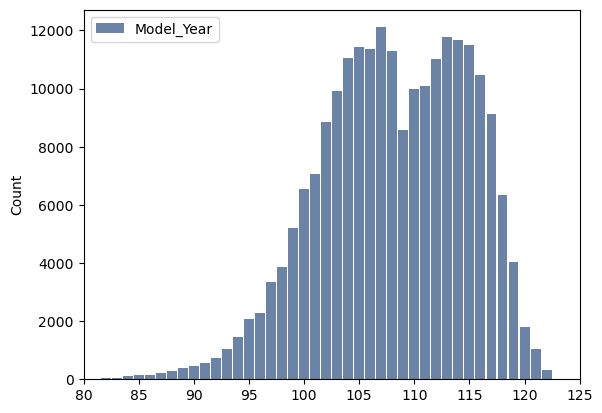

In [28]:
hist_mod_yr = thinkstats2.Hist(data.MODYR, label="Model_Year")
thinkplot.hist(hist_mod_yr)
thinkplot.Config(xlable="Model Year", ylabel="Count", xlim=[80,125])

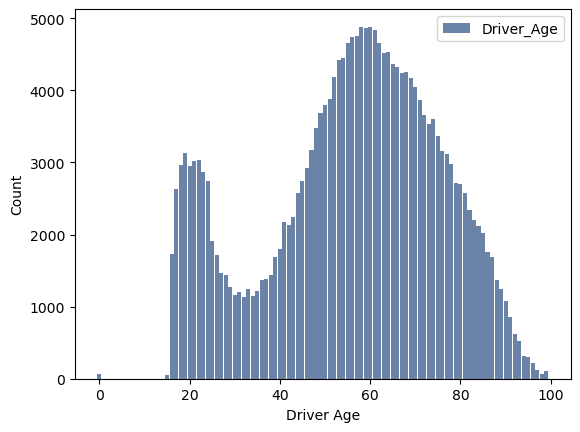

In [25]:
hist_yd_age = thinkstats2.Hist(data.YDAGE, label="Driver_Age")
thinkplot.Hist(hist_yd_age)
thinkplot.Config(xlabel="Driver Age", ylabel="Count")

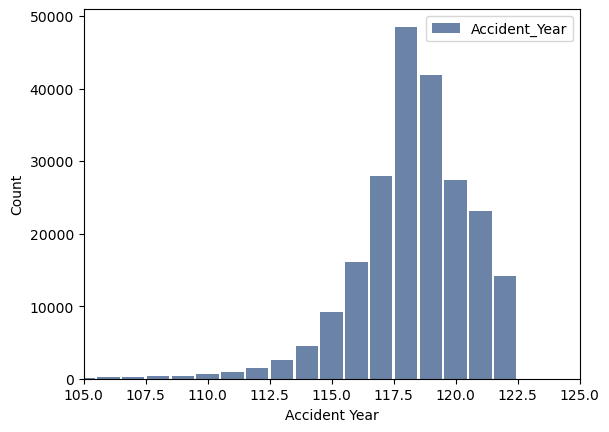

In [29]:
hist_ax_yr = thinkstats2.Hist(data.AXYR, label="Accident_Year")
thinkplot.Hist(hist_ax_yr)
thinkplot.Config(xlabel="Accident Year", ylabel="Count", xlim=[105,125])

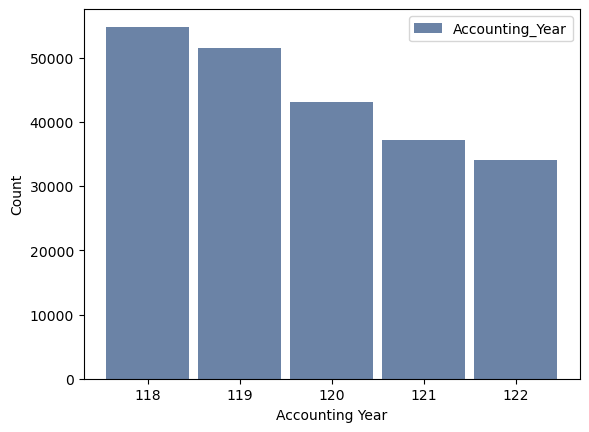

In [30]:
hist_act_yr = thinkstats2.Hist(data.ACTYR, label="Accounting_Year")
thinkplot.Hist(hist_act_yr)
thinkplot.Config(xlabel="Accounting Year", ylabel="Count")

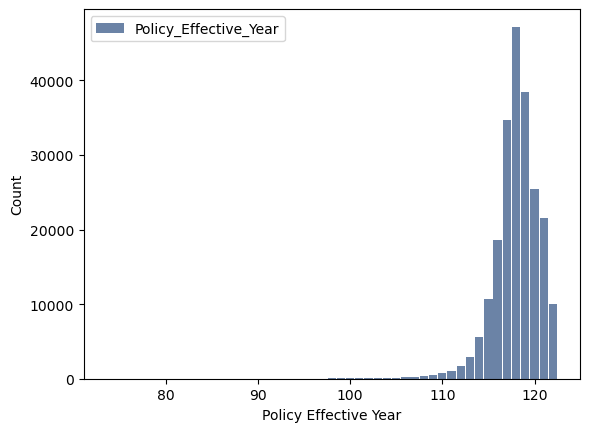

In [154]:
hist_eff_yr = thinkstats2.Hist(data.EFFYR, label="Policy_Effective_Year")
thinkplot.Hist(hist_eff_yr)
thinkplot.Config(xlabel="Policy Effective Year", ylabel="Count")

The histograms give information on the frequency of different variables. The two that will be analyzed further will be Model Year and Driver Age. The histrograms provided interesting information on the data, for one being the distribution of ages. The majority of ages seen in the graph seem to be within 50 and 70 years old. it is also interesting to see a dip in the amount of people in their 30s with less policies than those in their 20s. Also, the majority of vehicles seem to be lie between 2004-2007 and also 2013-2017. As the years approach present time, it makes sense that there is a dip in the amount of vehicles in the newer years, since not many people own brand new cars. 

In order to identify outliers, the Smallest and Highest frequencies can be analyzed. 

In [232]:
for Model_Year, freq in hist_mod_yr.Smallest(10):
    print(Model_Year, freq)

1 36
20 388
21 20
46 1
47 1
55 2
57 1
58 1
59 1
62 4


In [233]:
for Model_Year, freq in hist_mod_yr.Largest(10):
    print(Model_Year, freq)

123 13
122 319
121 1038
120 1814
119 4025
118 6353
117 9113
116 10465
115 11486
114 11672


In model year, we see that there are 36 vehicles with the model year of 1. These can be considered outlier or errors in the data since no vehicle can have a year of 1.

In [231]:
for Driver_Age, freq in hist_yd_age.Smallest(10):
    print(Driver_Age, freq)

0 60
15 50
16 1737
17 2634
18 2964
19 3132
20 2945
21 3014
22 3036
23 2868


In [27]:
for Driver_Age, freq in hist_yd_age.Largest(10):
    print(Driver_Age, freq)

99 105
98 63
97 119
96 212
95 298
94 317
93 518
92 627
91 850
90 1077


In the driver age variable, we see that there are a total of 60 individuals with the age of 0, these can be considered outliers since it is not possible to have the age of 0. However, this leaves a question with the underlying data and understanding why there would be a 0 value for age, same goes for having an model year of 1. With the largest frequencies, there are no underlying outliers that can be seen with this exercise. 

Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails. Using the stats module, these calculations can be done.

In [234]:
model_yr_mode = stats.mode(data.MODYR)
print("Model Year mode:", model_yr_mode)
driver_age_mode = stats.mode(data.YDAGE)
print("Driver's Age mode:", driver_age_mode)
ax_yr_mode = stats.mode(data.AXYR)
print("Accident Year mode:", ax_yr_mode)
act_yr_mode = stats.mode(data.ACTYR)
print("Accounting Year mode:", act_yr_mode)
eff_yr_mode = stats.mode(data.MODYR)
print("Effective Year mode:", eff_yr_mode)

Model Year mode: 107
Driver's Age mode: 58
Accident Year mode: 118
Accounting Year mode: 118
Effective Year mode: 107


In [62]:
model_yr_mean = stats.mean(data.MODYR)
print("Model Year mean:", model_yr_mean)
driver_age_mean = stats.mean(data.YDAGE)
print("Driver's Age mean:", driver_age_mean)
ax_yr_mean = stats.mean(data.AXYR)
print("Accident Year mean:", ax_yr_mean)
act_yr_mean = stats.mean(data.ACTYR)
print("Accounting Year mean:", act_yr_mean)
eff_yr_mean = stats.mean(data.MODYR)
print("Effective Year mean:", eff_yr_mean)

Model Year mean: 107.9298061883713
Driver's Age mean: 55.7547410177944
Accident Year mean: 118.26502096792474
Accounting Year mean: 119.74673467074692
Effective Year mean: 107.9298061883713


In [58]:
model_yr_var = stats.variance(data.MODYR)
print("Model Year variance:", model_yr_var)
driver_age_var = stats.variance(data.YDAGE)
print("Driver's Age variance:", driver_age_var)
ax_yr_var = stats.variance(data.AXYR)
print("Accident Year variance:", ax_yr_var)
act_yr_var = stats.variance(data.ACTYR)
print("Accounting Year variance:", act_yr_var)
eff_yr_var = stats.variance(data.MODYR)
print("Effective Year variance:", eff_yr_var)

Model Year variance: 62.692684492345215
Driver's Age variance: 386.58177291784455
Accident Year variance: 6.282239381241776
Accounting Year variance: 1.949067368078765
Effective Year variance: 62.692684492345215


In [61]:
model_yr_std = stats.stdev(data.MODYR)
print("Model Year standard deviation:", model_yr_std)
driver_age_std = stats.stdev(data.YDAGE)
print("Driver's Age standard deviation:", driver_age_std)
ax_yr_std = stats.stdev(data.AXYR)
print("Accident Year standard deviation:", ax_yr_std)
act_yr_std = stats.stdev(data.ACTYR)
print("Accounting Year standard deviation:", act_yr_std)
eff_yr_std = stats.stdev(data.MODYR)
print("Effective Year standard deviation:", eff_yr_std)

Model Year standard deviation: 7.917871209633636
Driver's Age standard deviation: 19.661682860778843
Accident Year standard deviation: 2.5064395826035337
Accounting Year standard deviation: 1.3960900286438425
Effective Year standard deviation: 7.917871209633636


Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

A PMf is created comparing drivers younger than 30 and drivers older than 30. 

In [113]:
# Selecting drivers younger than 30
younger_than_30 = data.loc[data["YDAGE"] <= 30]
younger_than_30_df = pd.DataFrame(younger_than_30)
younger_than_30_df

,ACTYR,AXYR,EFFYR,MODYR,YDAGE,CASUPL,CLEXP,CLLOSS,CMEXP,CMLOSS
11,122,119,118,118,19,-66061.41,8607.50,17156.0,3234.00,17156.0
12,122,122,121,106,25,20773.72,0.00,0.0,0.00,0.0
15,121,118,118,100,26,-3204.48,1488.00,20604.0,588.00,20604.0
17,119,119,119,106,18,9678.50,0.00,0.0,0.00,0.0
42,121,120,119,117,19,-100000.00,0.00,32000.0,0.00,32000.0
...,...,...,...,...,...,...,...,...,...,...
220544,121,118,117,111,22,-34059.00,5833.72,50000.0,5833.72,50000.0
220546,118,118,118,116,16,25680.31,0.00,0.0,0.00,0.0
220550,121,118,117,106,18,41031.80,0.00,0.0,435.00,0.0
220554,118,117,117,113,22,-42497.65,0.00,24600.0,0.00,24600.0


In [116]:
# Selecting Drivers older than 30
older_than_30 = data.loc[(data["YDAGE"] >= 31)]
older_than_30_df = pd.DataFrame(older_than_30)
older_than_30_df

,ACTYR,AXYR,EFFYR,MODYR,YDAGE,CASUPL,CLEXP,CLLOSS,CMEXP,CMLOSS
0,118,117,117,112,64,1868.65,0.0,0.0,0.00,0.0
1,122,119,119,111,74,33739.23,0.0,0.0,4809.39,0.0
2,121,119,119,111,75,137258.52,0.0,0.0,7487.80,0.0
3,120,120,120,101,59,0.00,0.0,0.0,0.00,0.0
4,119,119,119,102,63,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
220570,118,117,116,108,64,0.00,0.0,0.0,0.00,0.0
220571,120,120,120,114,49,24859.25,0.0,0.0,62.75,0.0
220572,121,121,121,120,45,0.00,0.0,0.0,0.00,0.0
220573,122,120,120,116,82,6863.10,0.0,0.0,0.00,0.0


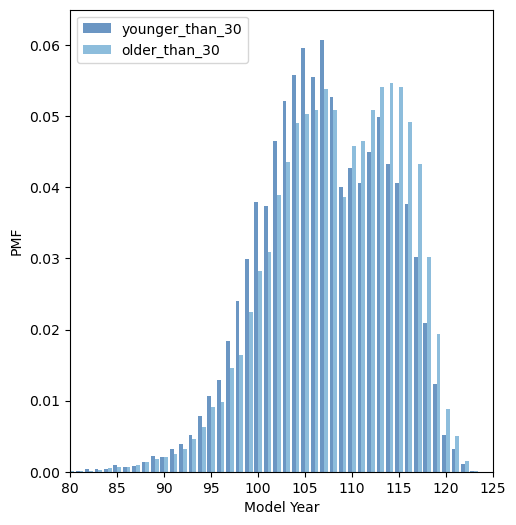

In [123]:
# Creating PMF for bother older and younger than 30 
younger_than_30_pmf = thinkstats2.Pmf(younger_than_30.MODYR, label="younger_than_30")
older_than_30_pmf = thinkstats2.Pmf(older_than_30_df.MODYR, label="older_than_30")
# Config for plot
width = 0.4
axis = [80, 125, 0, 0.065]
# Plots both PMF
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(younger_than_30_pmf, align="right", width=width)
thinkplot.Hist(older_than_30_pmf, align="left", width=width)
thinkplot.Config(xlabel="Model Year", ylabel="PMF", axis=axis)

The PMFs created and plotted comparing the model year of vehicles for drivers older and younger than thirty are displayed above. What can be seen, is that as age model year increases, there is more likelyhood that a person of thirty will own that vehicle. When looking at older vehicles, it is more likely that people younger than thirty have older vehilces.

Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

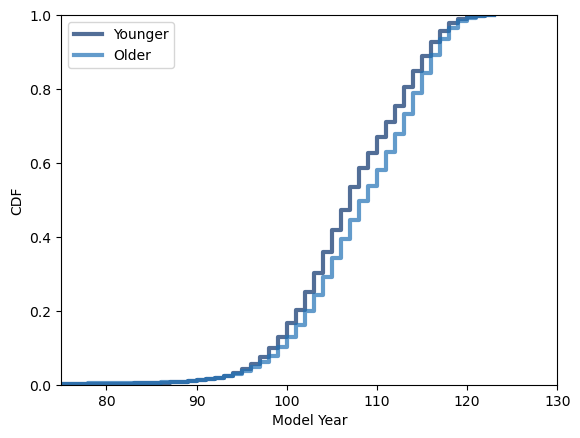

In [351]:
# Creates CDF of both older and younger
cdf = thinkstats2.Cdf(younger_than_30_df.MODYR, label='Younger')
cdf2 = thinkstats2.Cdf(older_than_30_df.MODYR, label='Older')

# Plots CDF
thinkplot.Cdfs([cdf, cdf2])
thinkplot.Config(xlabel='Model Year', ylabel='CDF', loc='upper left', legend='TRUE', axis=[75, 130, 0, 1])

The CDF created shows the distributions for both drivers older and younger than 30. With this, we see that people under the age of 30 are more likely to drive older vehicles. A small comparison that can be done is by comparing on prarticular year. If we chose the year 2010, younger individuals are 67% likely to drive a vehicle of that year or older while older individuals are 58% likely to drive a vehicle of that year or older.

In [243]:
cdf.Prob(110)

0.6695741255671008

In [244]:
cdf2.Prob(110)

0.5821307869749477

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [352]:
# Selects model year for each subset
older_modyr = older_than_30_df.MODYR.dropna()
younger_modyr = younger_than_30_df.MODYR.dropna()

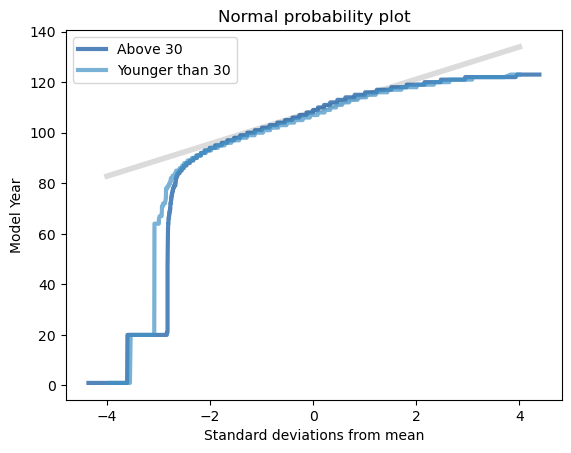

In [353]:
# Used from thinkstats2 to create normal probability plot
mean, var = thinkstats2.TrimmedMeanVar(older_modyr, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(older_modyr)
thinkplot.Plot(xs, ys, label="Above 30")

xs, ys = thinkstats2.NormalProbability(younger_modyr)
thinkplot.Plot(xs, ys, label="Younger than 30")
thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Model Year",
    legend="TRUE"
)

The plot that was choosen was a normal probability plot. This plot was chosen to see if the how the values of model year interact with age. The amount of vehicles less from the 60s are a lot lower than expected. For both age groups, it seems that the most vehilces lie between 2000 and 2018.

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

The first scatter plot that is created will explore Model Year of a vehicle and the Driver Age. 

In [355]:
# Carried over from thinkstats to create sample
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [354]:
# Samples both model year and age
sample = SampleRows(data, 8000)
model_yr_sample, age_sample = sample.MODYR, sample.YDAGE

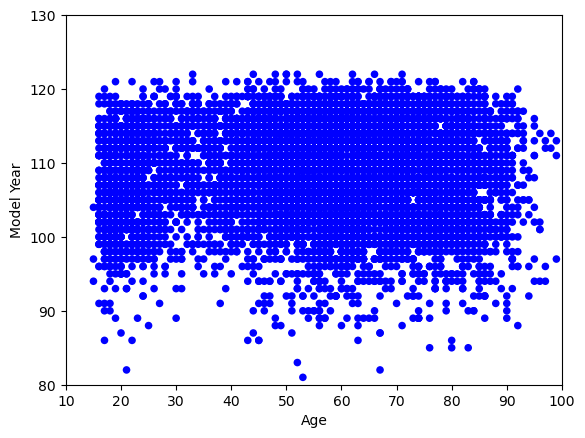

In [356]:
# Creates scatter plot of model year and age
thinkplot.Scatter(age_sample, model_yr_sample, alpha=1)
thinkplot.Config(xlabel='Age',
                 ylabel='Model Year',
                 axis=[10, 100, 80, 130],
                 legend=False)

The scatter plot is created on a sample of 8000 records. Upon intial viewing, there doesn't seem to be a liner correlation bewteen the two variables.

In [339]:
thinkstats2.Corr(model_yr_sample, age_sample)

0.03992917060485845

In [332]:
thinkstats2.SpearmanCorr(model_yr_sample, age_sample)

0.03855141551413717

When looking at the Correlation and Spearman correlation, what is seen in the graph seems to be accurately represented. Both correlations are near zero, meaning there is no correlation between the two. The next scenario will look at Current Month Losses and Model Year of a vehicle.

In [333]:
cmloss_sample = sample.CMLOSS.dropna()

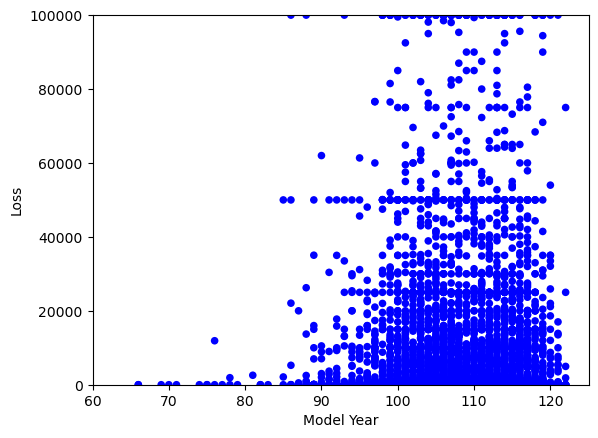

In [357]:
# Creates scatterplot of model year and cmloss
thinkplot.Scatter(model_yr_sample, cmloss_sample, alpha=1)
thinkplot.Config(xlabel='Model Year',
                 ylabel='Loss',
                 axis=[60, 125, 0, 100000],
                 legend=False)

In [338]:
thinkstats2.Corr(model_yr_sample, cmloss_sample)

0.01830216567866376

In [337]:
thinkstats2.SpearmanCorr(model_yr_sample, cmloss_sample)

-0.019474372781424415

With this scatter plot and correlation analysis, Spearman Correlation has a slightly negative correlation, which indicates that as model year goes up, cmloss goes down. 

Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [358]:
# carried over from thinkstats to create hypothesis test
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [359]:
# Cleans data to include only model year and age
cleaned = data.dropna(subset=['MODYR', 'YDAGE'])
ht_data = cleaned.MODYR.values, cleaned.YDAGE.values
# Conducts hypothesis test
ht = CorrelationPermute(ht_data)
pvalue = ht.PValue()
pvalue

0.0

The reported p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. That means that the p-value is probably smaller than  1/1000 , but it is not actually 0.

For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

This analysis will be conducted on Model Year and Age.

In [215]:
# Selects model year and age
model_yr, age = data.MODYR, data.YDAGE
# Least Squares
inter, slope = thinkstats2.LeastSquares(model_yr, age)
fit_xs, fit_ys = thinkstats2.FitLine(model_yr, inter, slope)

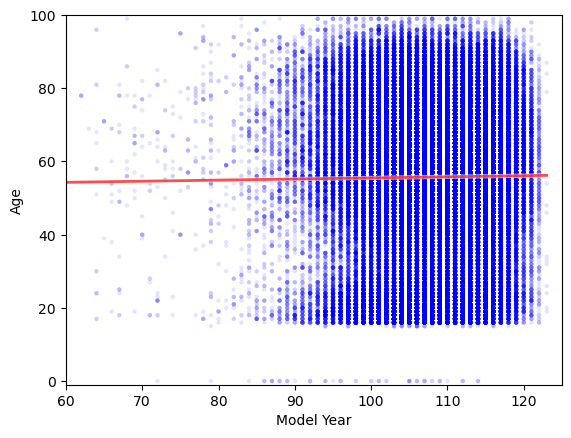

In [360]:
# Plots scatter plot with regression line
thinkplot.Scatter(model_yr, age, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Model Year",
                 ylabel='Age',
                 axis=[60, 125, -1, 100],
                 legend=False)

In [222]:
# Conducts analysis
import statsmodels.formula.api as smf

formula = 'MODYR ~ YDAGE'
model = smf.ols(formula, data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  MODYR   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     32.50
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.19e-08
Time:                        14:07:10   Log-Likelihood:            -7.6936e+05
No. Observations:              220575   AIC:                         1.539e+06
Df Residuals:                  220573   BIC:                         1.539e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.6573      0.051   2123.878      0.000     107.558     107.757
YDAGE          0.0049      0.001      5.701      0.000       0.003       0.007
==============================================================================
Omnibus:                   171104.216   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10139608.646
Skew:                          -3.249   Prob(JB):                         0.00
Kurtosis:                      35.573   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

  In this study, the two variables MODYR (Model Year) and YDAGE (Driver Age) were primarily analyzed. The initial assumption for this data that older individual possessed newer vehicles than younger. Upon analysis  driver age and model year don't seem to have a direct correlation, but there are some trends seen in the PMF and CDF portion of the study which give some insight on these two variables. When looking at model year and drivers younger than 30, they own more vehicles older than 2010. While those older than thirty own more vehicles newer than 2010.  
  
  One challenge presented is the type of data Allstate has. There were a few instances where there were anomalies or data that was not consistent with the other. Another option that could have been analyzed could be the losses on vehicles by model year to see if there are any trends, whether it be higher or lower losses, in the amount lost. This however, will have required different transformations in the  data since loss data can have an infinite range in losses.
  
  This EDA has given great insight on how driver age and model year interact. Although a stronger correlation between the two was assumed, that was not the case. In this study, a prediction model would give more  insight on the trends seen within driver age and model year. With this, if a model was created, we could see if we could predict the age given a model year. This opportunity can be explored in the future.

